# 第三章　随机抽样

作者：[王何宇](http://person.zju.edu.cn/wangheyu)

[浙江大学数学科学学院](http://www.math.zju.edu.cn)

本文档配合讲义第三章的逆变换随机抽样部分。讲义中的代码和图形都可在此验证。

In [1]:
from __future__ import print_function, division

# 这句话是非标准的python，用于ipthon或jupyter这样的系统中，表示绘图即刻自动展开。
%matplotlib inline

# 这里把全部Warning过滤掉了. 
# 参见https://docs.python.org/2/library/warnings.html
import warnings
warnings.filterwarnings('ignore')
from scipy.special import comb, perm
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
np.random.seed(250)

## 离散分布举例
下面产生一个服从$n，p$的二项分布。

In [2]:
n = 10
p = 0.3
k = np.arange(0, n + 1, 1)
# 生成器，在具体调用时产生序列。
PMF = [stats.binom.pmf(i, n, p) for i in k] 

In [3]:
print(PMF) # 表格中数据

[0.028247524900000005, 0.12106082100000018, 0.2334744405, 0.26682793200000016, 0.20012094900000013, 0.10291934520000007, 0.03675690899999999, 0.009001692000000002, 0.0014467004999999982, 0.00013778100000000015, 5.904899999999995e-06]


接下去绘制PMF和CDF的插图。这里也可以学习一下Python如何绘图。

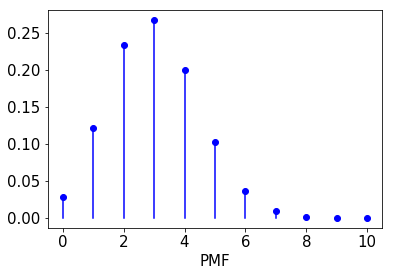

In [4]:
for i in k:
    plt.plot([k[i], k[i]],[0,PMF[i]],'b-') # 画n + 1条直线。
    plt.plot(k[i], PMF[i],'bo') # 顶部画个点。
plt.xticks(fontsize=15) # 调整一下标记字体。
plt.yticks(fontsize=15)
plt.xlabel(r'PMF',fontsize=15) # 加标题。
plt.savefig('PMF_bin.pdf')

将PMF累加即得离散分布的CDF，也即
$$
F(x_k) = \sum_{-\infty}^k f(x_i).
$$

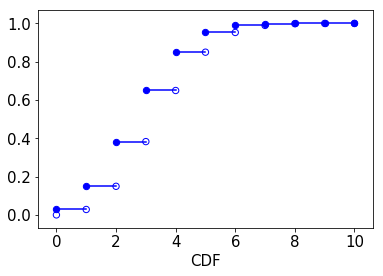

In [5]:
fig = plt.figure()
c = 0
CDF = [0]*(n + 1)
for i in range(n):
    c += PMF[i]
    CDF[i] = c
    plt.plot([k[i], k[i + 1]],[c, c],'b-') 
    # ''表示无颜色，但又给了edgecolors，就是为了画个空圈。s是大小。
    plt.scatter(k[i + 1], c, color='', marker='o', edgecolors='b', s=40)
    plt.scatter(k[i], c, color='b',marker='o', s=40)
plt.scatter(0, 0, color='',marker='o', edgecolors='b', s=40)
plt.scatter(n, 1, color='b',marker='o', s=40)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'CDF',fontsize=15)
plt.savefig('CDF_bin.pdf')
CDF[n] = 1

构建一个用于二分法查表的函数。稍微有一些针对性处理。关于二分查找和递归过程的内容可参考MIT的网络公开课《算法导论》，03年版。

In [6]:
def bisection_search(F, eta, start, end):
    if (eta <= F[start]):
        return start
    n = end - start
    if (n <= 0):
        sys.exit()
    k = (start + end) // 2
    if (eta > F[k]):
        if (eta <= F[k + 1]):
            return k + 1
        else:
            return bisection_search(F, eta, k + 1, end)
    else:
        return bisection_search(F, eta, start, k)

做1000000次随机抽取，形成二项分布的随机序列X。

In [7]:
U = np.random.rand(1000000)
X = [bisection_search(CDF, U[i], 0, n) for i in range(1000000)]

用统计来验证我们生成的随机序列确实服从目标分布。

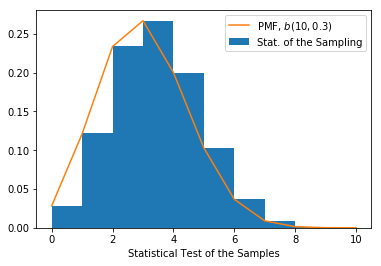

In [8]:
plt.hist(X, normed=True, label="Stat. of the Sampling");
plt.plot(PMF, label=r"PMF, $b(10, 0.3)$")
plt.legend()
plt.xlabel(r"Statistical Test of the Samples")
plt.savefig('test_bin.pdf')

实测结果和理论符合的很好。

## 连续分布举例
下面是连续情形的逆变换直接抽样。如果能写出逆变换的解析形式，而且便于计算，那么整个过程非常直接方便。这是一个Rayleigh分布直接抽样的例子。

In [9]:
def sample_Rayleigh(U, sigma):
    return [np.sqrt(-2 * sigma**2 * np.log(u)) for u in U]

还是直接抽样1000000次。

In [13]:
U = np.random.rand(1000000)
X = sample_Rayleigh(U, 0.5)

In [16]:
X

[0.7321444564886802,
 0.3638704716402325,
 0.8135789413743426,
 0.6563017805322204,
 0.8636161770155102,
 0.984845493388705,
 0.15850904939178836,
 1.1756782104998396,
 0.8467300357967114,
 0.46194916871609415,
 0.10289399128608766,
 0.639019589614664,
 0.9896755084651437,
 0.6279283541120169,
 0.3353044701478551,
 0.5458928715179472,
 1.1707042648768167,
 0.36938194135840086,
 1.0383100011639184,
 0.8120292773989553,
 0.6049752221476211,
 0.5394829246794841,
 1.4515266821239545,
 0.9453098120545439,
 0.49896295681003766,
 0.6832650050729895,
 0.5890241694477856,
 0.8941220402147871,
 0.6298569011381251,
 0.10908586115261182,
 0.791611625473773,
 0.6073042079141502,
 0.8502015770466608,
 0.7571029679835318,
 0.4977219339620305,
 2.086148045975935,
 1.0762153304811652,
 0.45718690544679363,
 0.28182656891463925,
 0.8151787884545005,
 1.6968827876736912,
 0.7929675368350636,
 0.37772234599253085,
 0.41000531267401197,
 0.8438538570989144,
 0.8253252268021994,
 0.49141659279566197,
 0.269

同样的，我们需要统计验证。

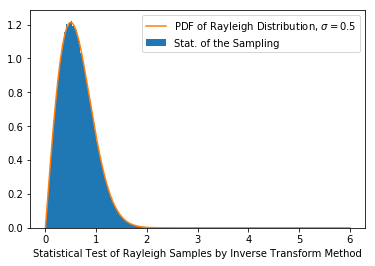

In [17]:
s = 0.5
x = np.linspace(0,6,10000)
f = (x/s**2) * np.exp(-x**2/(2 * s**2))
plt.hist(X, bins=200,normed=True, label="Stat. of the Sampling");
plt.plot(x, f, label=r"PDF of Rayleigh Distribution, $\sigma = 0.5$")
plt.legend()
plt.xlabel(r"Statistical Test of Rayleigh Samples by Inverse Transform Method")
plt.savefig('Ray_inv.pdf')

这里hist的参数bins=50代表了做统计的区间分段数，由于我们的样本数足够，这个数字越大，统计图会越连续。

In [18]:
def sample_Exponential(U, beta):
    return [-beta * np.log(u) for u in U]

Text(0.5,0,'Statistical Test of Exponential Samples by Inverse Transform Method')

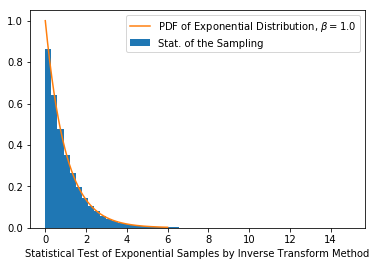

In [20]:
U = np.random.rand(1000000)
beta = 1.0
X = sample_Exponential(U, beta)
x = np.linspace(0,6,10000)
f = 1/beta * np.exp(-x/beta)
plt.hist(X, bins=50,normed=True, label="Stat. of the Sampling");
plt.plot(x, f, label=r"PDF of Exponential Distribution, $\beta = 1.0$")
plt.legend()
plt.xlabel(r"Statistical Test of Exponential Samples by Inverse Transform Method")
#plt.savefig('Exp_inv.pdf')

## 接受－拒绝方法（Accept-Rejection Method）

下面是用AR方法抽取标准半正态分布的过程。

In [21]:
def sample_half_normal(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    U = np.random.rand(N)  # 产生均匀分布
    X = [-np.log(u) for u in U]  # 产生服从h的随机变量X, 实际上是beta(1)
    G = [np.exp(-(x-1)**2/2) for x in X]   # 计算g(X)
    U = np.random.rand(N)  # 再次产生均匀分布
    for i in range(N):
        if U[i] <= G[i]:  # 在g发生的条件下接受
            X[k] = X[i]   # 将采样记下来
            k = k + 1
    return k, X

实际产生100万个服从标准半正态分布的随机数。然后做统计检测并和PDF对比。

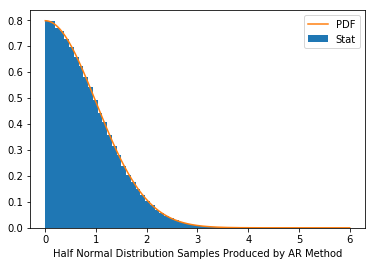

In [22]:
N = 1000000
k, X = sample_half_normal(N)
1000000/k
x = np.linspace(0,6,10000)
plt.hist(X[0:k], bins=50, normed=True, label=r"Stat");
plt.plot(x,np.sqrt(2/np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Half Normal Distribution Samples Produced by AR Method")
plt.savefig('half_normal.pdf')

结果匹配一致。然后下面将其改造为标准正态分布。

In [23]:
for i in range(k):
    w = np.random.rand()
    if w > 0.5:
        X[i] = -X[i]

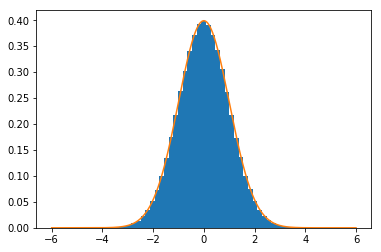

In [24]:
x = np.linspace(-6,6,10000)
plt.hist(X[0:k], bins=50, normed=True, label="Stat. of the Sampling");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2))

为防止重复抽取，应该直接在AR抽取中直接产生标准正态分布更好。

In [25]:
def sample_normal(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    U = np.random.rand(N)  # 产生均匀分布
    X = [-np.log(u) for u in U]  # 产生服从h的随机变量X
    G = [np.exp(-(x-1)**2/2) for x in X]   # 计算g(X)
    U = np.random.rand(N)  # 再次产生均匀分布
    for i in range(N):
        if U[i] <= G[i]:  # 在g发生的条件下接受
            w = np.random.rand()
            if w <= 0.5:
                X[k] = X[i]
            else:
                X[k] = -X[i]
            k = k + 1
    return k, X

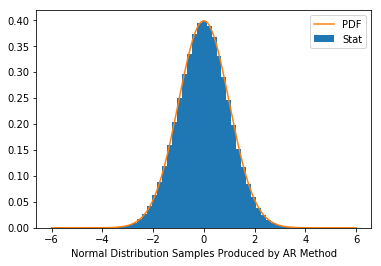

In [26]:
N = 1000000
k, X = sample_normal(N)
N/k
x = np.linspace(-6,6,10000)
plt.hist(X[0:k], bins=50,normed=True, label="Stat");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Normal Distribution Samples Produced by AR Method")
plt.savefig('normal.pdf')

注意这个统计图本身是不对称的，因为有概率涨落。但是进一步加细可以看到，其“极限”和目标PDF匹配的很好。

In [ ]:
plt.hist(X[0:k], bins=100,normed=True, label="Stat");
plt.plot(x,1/np.sqrt(2*np.pi)*np.exp(-x**2/2), label=r"PDF")

现在回到半正态分布的例子。我们可以画出接受和拒绝区域。而常数$c$就是接受区域的面积（总面积是１）。

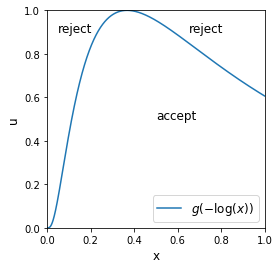

In [27]:
x = np.linspace(0,1,10000)
z = -np.log(x)
u = np.exp(-(z - 1)**2 / 2)
plt.plot(x,u,label=r'$g(-\log(x))$')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
#plt.axis("equal")
axs = plt.gca()
axs.set_aspect('equal', 'box')
plt.text(0.65, 0.9, r'reject',fontsize="12")
plt.text(0.05, 0.9, r'reject',fontsize="12")
plt.text(0.5, 0.5, r'accept',fontsize="12")
plt.legend(fontsize="12")
plt.xlabel(r"x",fontsize="12")
plt.ylabel(r"u",fontsize="12")
plt.savefig('AR_region.pdf')

如果我们有办法快速产生指数分布，比如我们直接调用Python提供的指数分布生成函数，那么下面的版本有可能比原始版本代价更低。当然这里速度的变化主要是Python提供的指数分布生成程序实在太快了。

In [28]:
def sample_half_normal_v2(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    X = stats.expon.rvs(size=N)  
    G = stats.expon.rvs(size=N)  # 产生两个独立的EXP(1)
    for i in range(N):
        if (X[i] - 1)**2/2 <= G[i]:  # 等价于在g的条件下接受
            X[k] = X[i]   # 将采样记下来
            k = k + 1
    return k, X

Text(0.5,0,'Half Normal Distribution Samples Produced by AR Method')

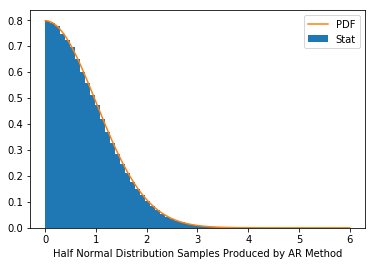

In [29]:
N = 1000000
k, X = sample_half_normal_v2(N)
1000000/k
x = np.linspace(0,6,10000)
plt.hist(X[0:k], bins=50, normed=True, label=r"Stat");
plt.plot(x,np.sqrt(2/np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Half Normal Distribution Samples Produced by AR Method")

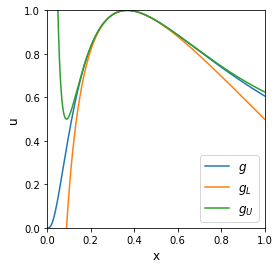

In [30]:
x = np.linspace(0,1,10000)
z = -np.log(x)
g = np.exp(-(z - 1)**2 / 2)
gl = 1 - (z - 1)**2 / 2
gu = 1 - (z - 1)**2 / 2 + (z - 1)**4 / 8
plt.plot(x,u,label=r'$g$')
plt.plot(x,gl,label=r'$g_L$')
plt.plot(x,gu,label=r'$g_U$')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
axs = plt.gca()
axs.set_aspect('equal', 'box')
plt.legend(fontsize="12")
plt.xlabel(r"x",fontsize="12")
plt.ylabel(r"u",fontsize="12")
plt.savefig('squeeze.pdf')